# SVM

Objective: Build a model to predict if a single compound is a "PPI modulator" or is not.

Data: ADME descriptors for 3 libraries.
    Libraries:
        AFRODB
        Biofacquim
        FDA
        PPI
        
        
    Endpoint: "PPI modulator" (Binary)
        1 -> PPI modulator
        0 -> Not PPI modulator
        
    Descriptors
        ADME descriptors:
            '#Aromatic heavy atoms'
            '#H-bond acceptors'
            '#H-bond donors'
            '#Heavy atoms'
             
Method: Support Vector Machine

## Import Libraries

In [35]:
import pandas as pd
import numpy as np

import os

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from Functions_SVM import test_compound,test_compound_real_category, svm_report, plot_roc

In [36]:
descriptors = ['HBA', 'HBD', 'RB', 'LogP', 'TPSA', 'MW', 'Heavy Atom', 'Ring Count', 'Fraction CSP3',]
#Falta generar los descriptores

In [59]:
#Difacquim computer root
root = {"root": "/home/barbara/Documents/DIFACQUIM/PPI_classifier/phase-1/Databases/",
        "root_Info" : "/home/barbara/Documents/DIFACQUIM/PPI_classifier/phase-1/Supervised_Models/SVM/Info",
        "root_ROC" : "/home/barbara/Documents/DIFACQUIM/PPI_classifier/phase-1/Supervised_Models/SVM/ROC"}

In [60]:
class SVM:
    
    def __init__(self, root, input_file, target, descriptors, fraction):
        self.Data  = pd.read_csv(str(root["root"]) + str(input_file))
        #Muestreo
        self.Data = pd.DataFrame.sample(self.Data, frac=0.3, replace=True,  random_state=1992, axis=None) 
        self.fraction = fraction
        print(self.Data.PPI.unique())
        print("Libraries are: ", self.Data.Library.unique())
        #print("PPI modulator: ", self.Data[target].unique())
        print("Total compounds ", self.Data.shape[0])
        self.descriptors = descriptors
        self.target = target
        self.root = root
        
    def train_model(self, kernel, class_weight):
        """
        kernel: str, ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ )
        class_weight : ‘balanced’
        """
        y = np.array(self.Data[self.target])
        y = label_binarize(y, classes = ["No", "Yes"])
        print(y)
        X_train, X_test, y_train, y_test = train_test_split(self.Data[self.descriptors], y, test_size = self.fraction,random_state=1992)
        model = SVC(kernel = kernel, probability=True, cache_size = 16,  class_weight =  class_weight, random_state=1992)
        print(model)
        model.fit(X_train, y_train)
        self.atributes = {
            "kernel" : kernel
        }
        print("support",model.support_.shape, model.support_)
        print("support_vectors_", model.support_vectors_)
        print("n_support_", model.n_support_)
        print("dual_coef_", model.dual_coef_)
        if kernel == "linear":
            print("coef_", model.coef_)
        print("intercept_", model.intercept_)
        print("fit_status_", model.fit_status_)
        print("prob A", model.probA_, "prob B", model.probB_)
        self.predictions = {
            "predictions": model.predict(X_test),
            "y_score": model.decision_function(X_test),
            "X_text": X_test,
            "y_test": y_test
        }
        self.model = model
        
                        
    def single_prediction(self, Library, Name, target):
        compound = test_compound(self.Data, Library, Name, self.descriptors)   
        result = test_compound_real_category(self.Data, Name, target)
        print("Evaluation of ", str(Name))
        print("Predicted activity value: ", str(self.model.predict(compound)))
        print("Real activity value", result)
    
    def report(self, ref_output):
        roc_auc = plot_roc(ref_output,self.predictions["y_test"], self.predictions["y_score"], self.root["root_ROC"])
        r = svm_report(ref_output, self.Data, self.atributes["kernel"], self.fraction, self.predictions["y_test"], self.predictions["predictions"], self.descriptors, roc_auc, self.root["root_Info"])

In [61]:
a = SVM(root, "Dataset.csv", "PPI", descriptors, 0.3)

['No' 'Yes']
Libraries are:  ['Epidatabase' 'FDA' 'PPI' 'AFRODB' 'BIOFACQUIM']
Total compounds  6325


In [62]:
a.train_model('rbf', "balanced")

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
SVC(C=1.0, cache_size=16, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=1992,
    shrinking=True, tol=0.001, verbose=False)


/home/barbara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbara/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


support (3193,) [   0    3   10 ... 4383 4401 4423]
support_vectors_ [[ 3.  0.  1. ... 14. 14. 14.]
 [ 4.  2.  7. ... 21. 21. 21.]
 [ 6.  3.  5. ... 31. 31. 31.]
 ...
 [ 3.  3.  9. ... 49. 49. 49.]
 [ 5.  1.  5. ... 26. 26. 26.]
 [ 4.  2. 11. ... 44. 44. 44.]]
n_support_ [2860  333]
dual_coef_ [[-0.16758951 -0.11920215 -0.10431992 ...  1.7950284   3.56911805
   1.79497241]]
intercept_ [-0.79529338]
fit_status_ 0
prob A [-2.72947104] prob B [-0.48338097]


In [63]:
#a.single_prediction("PPI", "1602", "PPI")

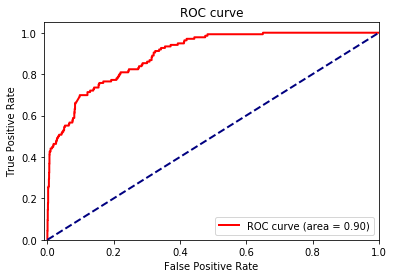

/home/barbara/Documents/DIFACQUIM/PPI_classifier/phase-1/Supervised_Models/SVM/Functions_SVM.py:66: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  Report.to_csv(str(root_Info) + "/SVM_"+str(ref_output)+".csv", sep = ",")


In [64]:
a.report("MyfirstSVM2")

In [9]:
#Identify Numerical Data (Descriptors)
def numerical_descriptors(DataFrame):
    print(DataFrame.select_dtypes(np.number).columns)

In [10]:
#Muestreo
#self.Data = pd.DataFrame.sample(self.Data, frac=0.3, replace=True,  random_state=1992, axis=None) 
        